In [1]:
!python --version

Python 3.7.9


In [4]:
!pip3 install whitebox -U

In [202]:
!pip3 install laspy==2.0.3

## LAS POINT CLOUD FORMAT
### INTRO: Get info about your downloaded LAS file by using whitebox library
Download LAS file from this site https://www.swisstopo.admin.ch/en/geodata/height/surface3d.html#technische_details
<br>(whitebox library manual: https://www.whiteboxgeo.com/manual/wbt_book/available_tools/lidar_tools.html)

In [7]:
import whitebox

wbt = whitebox.WhiteboxTools()

input_las = '/Users/lubica.dubravcova/Documents/OpenSlava2021/swissSURFACE3D_example/2695_1259.las'
info_html = '/Users/lubica.dubravcova/Documents/OpenSlava2021/swissSURFACE3D_example/2695_1259_info.html'

##################### INFO ABOUT LAS FILE ################# 
### DOCUMENTATION FOR FUNCTION https://www.whiteboxgeo.com/manual/wbt_book/available_tools/lidar_tools.html#LidarInfo
wbt.lidar_info(input_las, info_html)

./whitebox_tools --run="LidarInfo" --input='/Users/lubica.dubravcova/Documents/OpenSlava2021/swissSURFACE3D_example/2695_1259.las' --output='/Users/lubica.dubravcova/Documents/OpenSlava2021/swissSURFACE3D_example/2695_1259_info.html' --vlr --geokeys



0

### EXCERCISE 2. <br>
### Filter separately point clouds classified with number 6 and number 3 and create new LAS files. Test your result in CloudCompare. What do these class numbers represent?
Use whitebox library https://www.whiteboxgeo.com/manual/wbt_book/available_tools/lidar_tools.html for one filtering and laspy library for another.
Steps:

* Original LAS file

* View in CloudCompare

* Select and store separately class 3 and 6 in Python

* View class LAS files in CloudCompare

* Let us know what is it :)

In [205]:
import whitebox
import laspy

wbt = whitebox.WhiteboxTools()

input_las = '/Users/lubica.dubravcova/Documents/OpenSlava2021/swissSURFACE3D_example/2695_1259.las'
output_las_class3 = '/Users/lubica.dubravcova/Documents/OpenSlava2021/swissSURFACE3D_example/2695_1259_class3.las'
output_las_class6 = '/Users/lubica.dubravcova/Documents/OpenSlava2021/swissSURFACE3D_example/2695_1259_class6.las'


las = laspy.read('/Users/lubica.dubravcova/Documents/OpenSlava2021/swissSURFACE3D_example/2695_1259.las')
new_file = laspy.create(point_format=las.header.point_format, file_version=las.header.version)
new_file.points = las.points[las.classification == 6]

new_file.write(output_las_class6)

##################### NEW LAS FILES AFTER SELECTION SOME CLASS/CLASSES ################# 
## function for creating .las file for specific class
## For example: If you want .las file for Low Vegetation (3) you need removed this number from exclude_cls string 
### DOCUMENTATION FOR FUNCTION https://jblindsay.github.io/wbt_book/available_tools/lidar_tools.html#FilterLidarClasses 
wbt.filter_lidar_classes(input_las, output_las_class3, exclude_cls='0,1,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,26,27,28,29,30,31')



AttributeError: module 'laspy' has no attribute 'read'

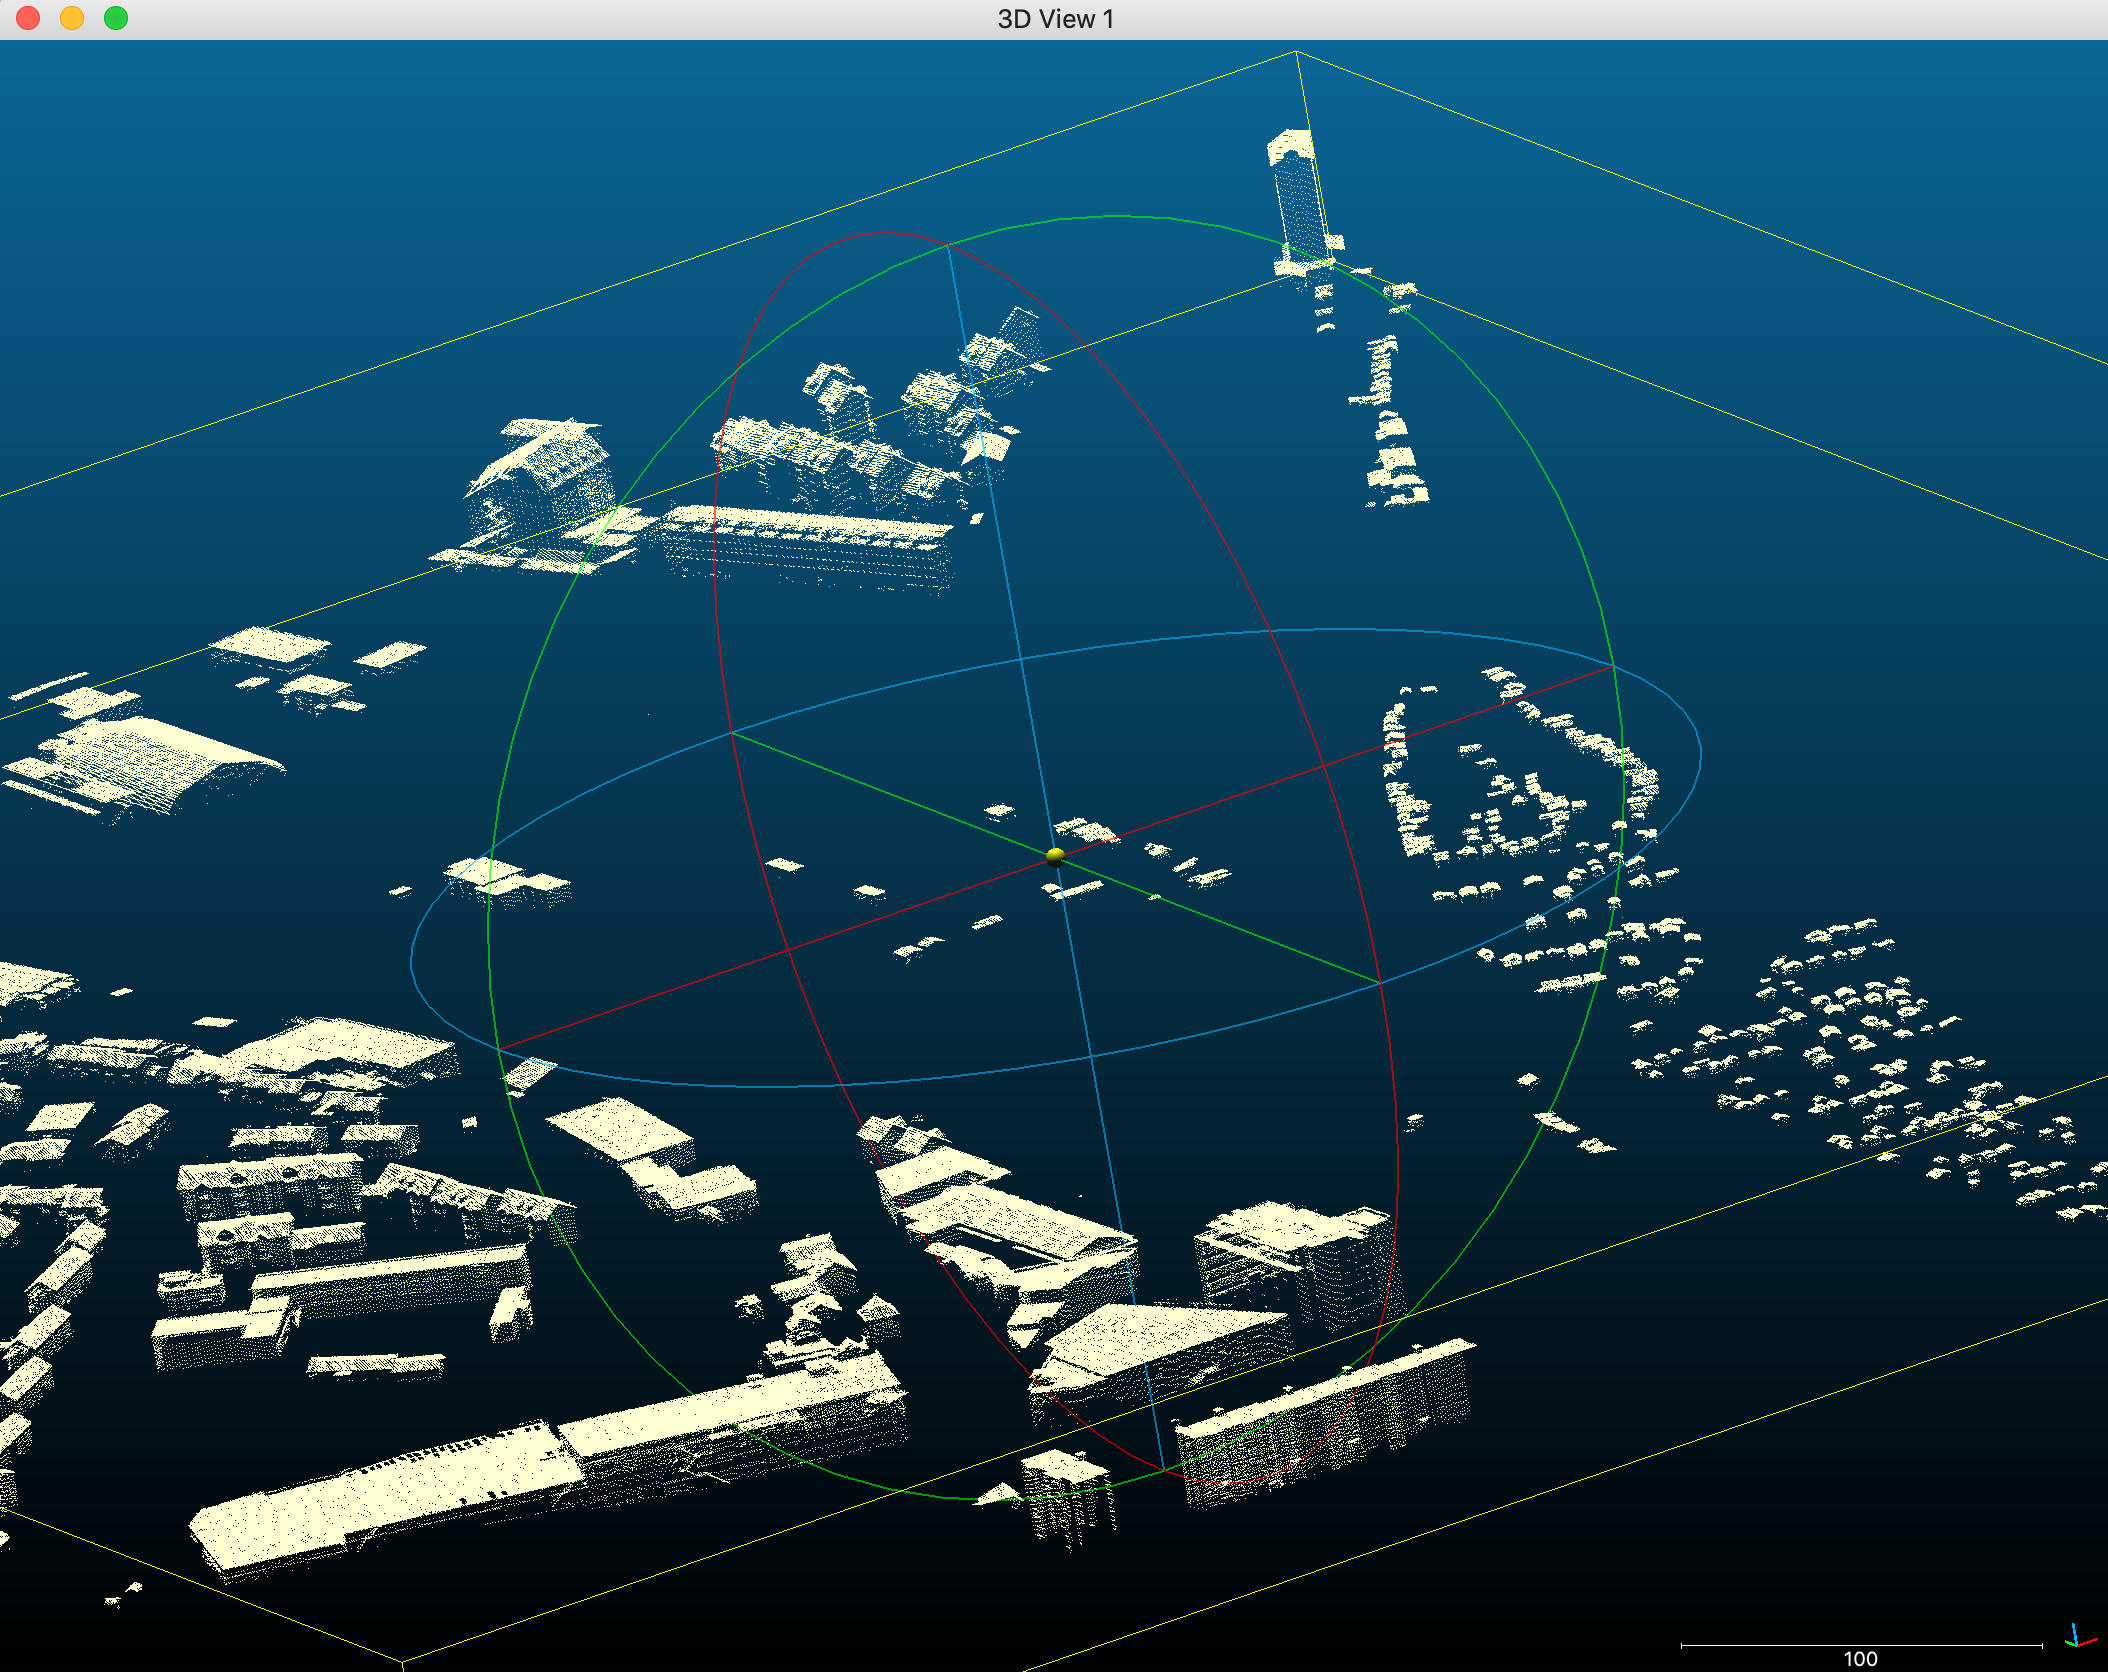


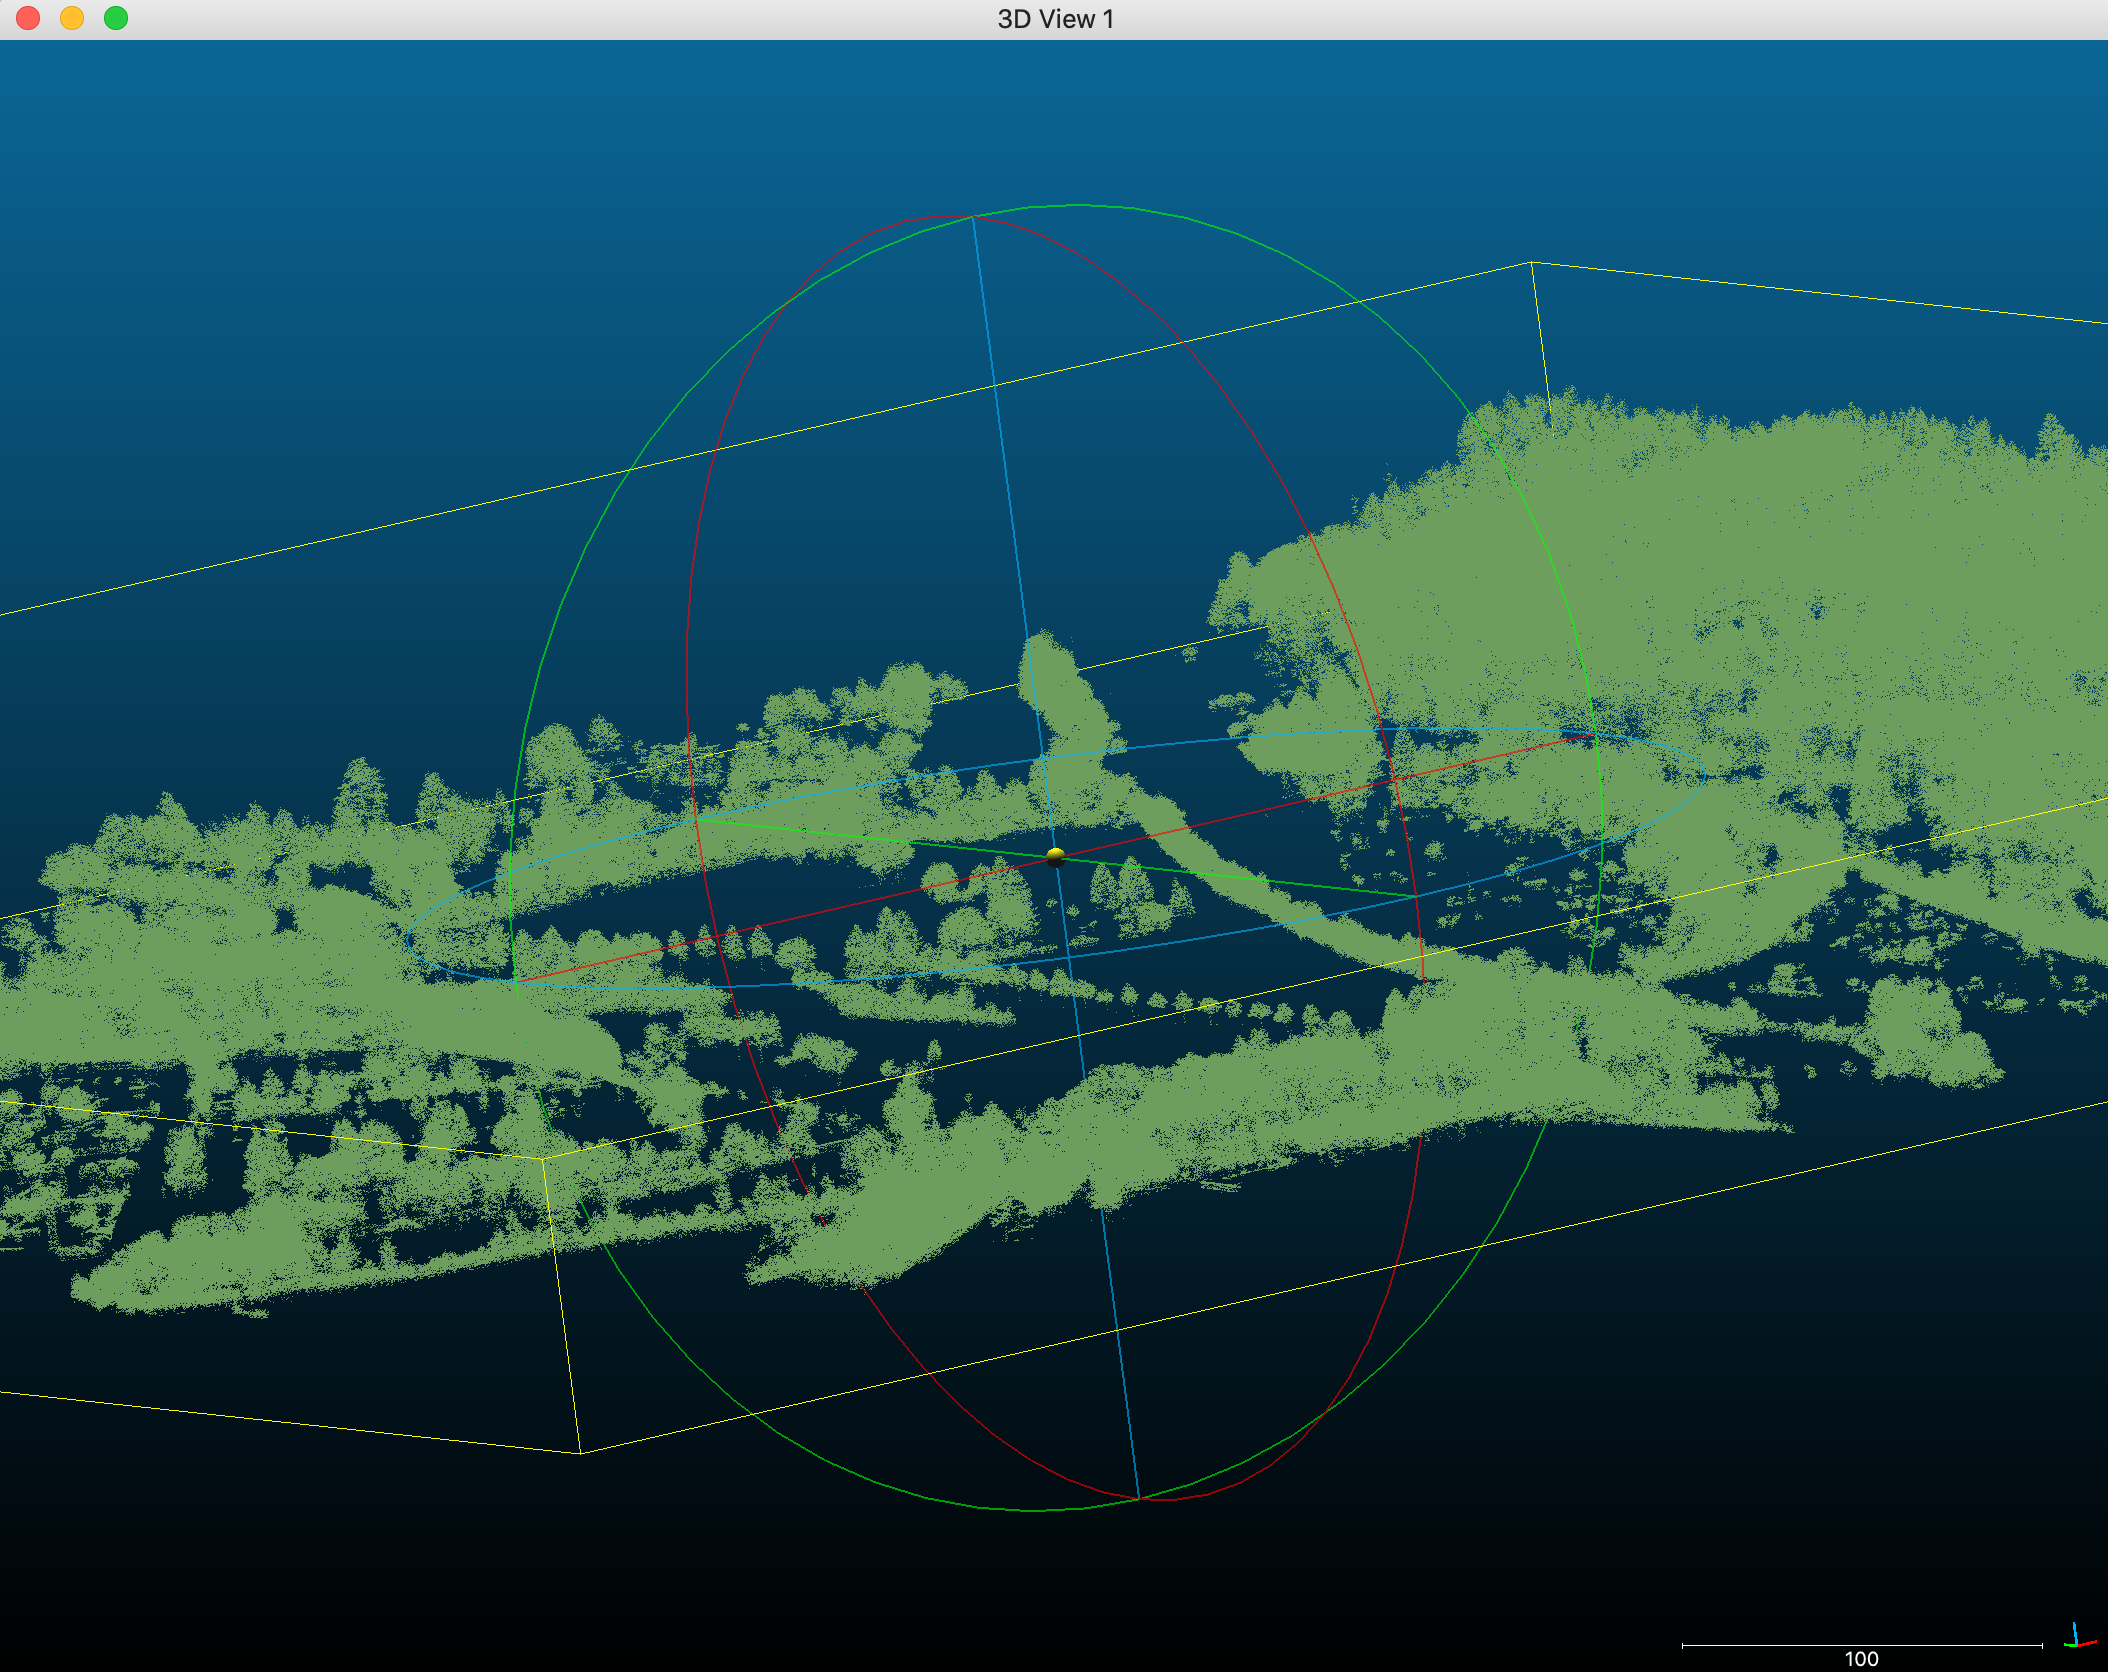

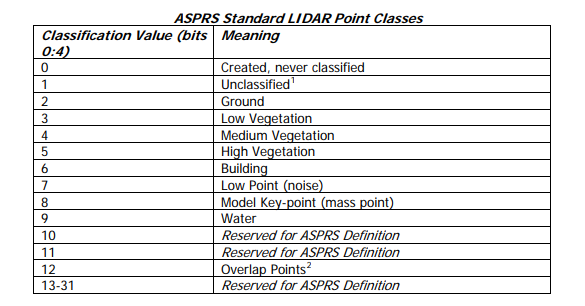
https://www.asprs.org/wp-content/uploads/2010/12/asprs_las_format_v12.pdf

### EXCERCISE 3. <br>
### Try to clustering.
Steps:

* Use flann library to compute 100 nearest point clouds to a selected point cloud

* Create a csv file of nearest points with all specification for LAS file

* Change class number to number 10

* Generate a new LAS file

* View new LAS file in CloudCompare

* Try to cluster only one building

In [198]:
# Install this library to read LAS File
!pip3 install laspy

# To Measure distance
!pip3 install pyflann-py3

### Create a csv file and create new las file only with 1000 point clouds

In [15]:
import csv
import whitebox

wbt = whitebox.WhiteboxTools()

input_las = '/Users/lubica.dubravcova/Documents/OpenSlava2021/swissSURFACE3D_example/2695_1259_class6.las'

# create csv file from LAS
wbt.las_to_ascii(input_las)

csv = '/Users/lubica.dubravcova/Documents/OpenSlava2021/swissSURFACE3D_example/2695_1259_class6.csv'


with open('/Users/lubica.dubravcova/Documents/OpenSlava2021/swissSURFACE3D_example/2695_1259_class6.csv', 'r') as file:
    rdr = csv.reader(file)
    header = next(rdr)
    i = 0
    with open('/Users/lubica.dubravcova/Documents/OpenSlava2021/swissSURFACE3D_example/2695_1259_class6_1000.csv', 'w') as result:
        wr = csv.writer(result)
        wr.writerow(['X','Y','Z','INTENSITY','CLASS','RETURN','NUM_RETURN','SCAN_ANGLE','TIME'])
        if header != None:
            for r in rdr:
                if i <= 1000:
                    wr.writerow(r)
                    i+=1


./whitebox_tools --run="LasToAscii" --inputs='/Users/lubica.dubravcova/Documents/OpenSlava2021/swissSURFACE3D_example/2695_1259_class6.las'



0

### Converting cvs to las file using whitebox library https://www.whiteboxgeo.com/manual/wbt_book/available_tools/lidar_tools.html 
You will need a projection number. https://spatialreference.org/ref/epsg/2056/

In [199]:
import whitebox

wbt = whitebox.WhiteboxTools()

building_csv = '/Users/lubica.dubravcova/Documents/OpenSlava2021/swissSURFACE3D_example/2695_1259_class6_1000.csv'


## Projection number https://spatialreference.org/ref/epsg/2056/
wbt.ascii_to_las(
    inputs=building_csv,
    pattern='x,y,z,i,c,rn,nr,sa,time',
    proj='2056'
)

./whitebox_tools --run="AsciiToLas" --inputs='/Users/lubica.dubravcova/Documents/OpenSlava2021/swissSURFACE3D_example/2695_1259_class6_1000.csv' --pattern='x,y,z,i,c,rn,nr,sa,time' --proj='2056'



0

### Using flann library to compute 100 nearest neighbors

In [200]:
import laspy
import numpy as np
from pyflann import *
import csv
flann = FLANN()

def nearest_100_points(other_points, first_point, points=100):
    neighbors = flann.nn(other_points, first_point, num_neighbors = points)
    return neighbors

# ######################### 1000 point clouds of buildings ##################################################
inFile = laspy.read("/Users/lubica.dubravcova/Documents/OpenSlava2021/swissSURFACE3D_example/2695_1259_class6_1000.las")
coords_buildings = np.vstack((inFile.x, inFile.y, inFile.z)).transpose()
coords_buildings_allinfo = np.vstack((inFile.x, inFile.y, inFile.z, inFile.intensity, inFile.raw_classification, inFile.user_data,inFile.pt_src_id, inFile.scan_angle_rank, inFile.gps_time)).transpose()


for i in range(1,len(coords_buildings)):
    first_point = coords_buildings[0]
    other_buildings_points = coords_buildings[1:]
    
    ################# Step 1 - Find 100 Nearest Buildings Points ####################
    nn_points = nearest_100_points(other_buildings_points, first_point, points=100)
    
nearest_building_point_clouds = []
results = nn_points[0][0]
distance = nn_points[1][0]
max_dist = max(distance)

for i in range(0, len(results)):
    if distance[i] < 50:
        nearest_building_point_clouds.append(coords_buildings_allinfo[i])
    
nearest_building_point_clouds = np.array(nearest_building_point_clouds)

cluster = []

for point in nearest_building_point_clouds:
    building_point = ['{:7f}'.format(item) for item in point]
    building_point = list(map(float, point))
    building_point = [building_point[0], building_point[1], building_point[2], int(building_point[3]), 10, int(building_point[5]), int(building_point[6]), int(building_point[7]), building_point[8]]
    cluster.append(building_point)

with open('/Users/lubica.dubravcova/Documents/OpenSlava2021/swissSURFACE3D_example/2695_1259_class6_1000_nearest100.csv','w') as f:
    writer = csv.writer(f)
    writer.writerow(['X','Y','Z','INTENSITY','CLASS','RETURN','NUM_RETURN','SCAN_ANGLE','TIME'])
    writer.writerows(cluster)

    
    

### Create a final LAS file

In [196]:
import whitebox

wbt = whitebox.WhiteboxTools()

building_csv = '/Users/lubica.dubravcova/Documents/OpenSlava2021/swissSURFACE3D_example/2695_1259_class6_1000_nearest100.csv'

## Projection number https://spatialreference.org/ref/epsg/2056/
wbt.ascii_to_las(
    inputs=building_csv,
    pattern='x,y,z,i,c,rn,nr,sa,time',
    proj='2056'
)

./whitebox_tools --run="AsciiToLas" --inputs='/Users/lubica.dubravcova/Documents/OpenSlava2021/swissSURFACE3D_example/2695_1259_class6_1000_nearest100.csv' --pattern='x,y,z,i,c,rn,nr,sa,time' --proj='2056'



0